In [1]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import os
rng = np.random.default_rng()


In [2]:
from PIL import Image

In [3]:
def spectrogram_for_random_snippet(y,fileid):
    dur=5*44100
    I=np.random.choice(range(len(y)-dur))
    s=y[I:I+dur]
    nperseg=1024
    f, t, Sxx = signal.spectrogram(s, fs=44100, nperseg=nperseg)
    return(f,t,Sxx)

In [4]:
# just tensors stacked& y is numbered
import re
g=0
X=[]
Y=[]
# genrelst=['Bachata','Tango']
genrelst=['Bachata', 'Tango']
for genre in genrelst:
#     print(genre)
    count=0
    L=os.listdir(genre)
    L=[x for x in L if re.search("\.wav$",x)]
    for filename in os.listdir(genre):
        fileid=genre+"\{0}".format(filename)
        
        print(fileid)
#         print(fileid)
        try:
            count+=1
            x,samplerate=sf.read(fileid)
#             print(samplerate)
#             print(x.shape)
            #
            # make this mono by adding the two channels
            #
            y=x[:,0]+x[:,1]
            y.shape
            f,t,Sxx=spectrogram_for_random_snippet(y,fileid)
#             Tri_Sxx = tf.tile(np.log(Sxx), [1, 3])
            Tri_Sxx=np.log(Sxx)
            X.append(Tri_Sxx)
            Y.append(g)
            count+=1
            if count>4:
                break
        except:
            print("exception for fileid = "+fileid)
            pass
       
        g+=1
#         

Bachata\01 Cuentale.wav
Bachata\01 Lloro.wav
Tango\02 Invierno.wav
Tango\Azucar.wav


In [5]:
lenX=len(X)
print(lenX)
print(X[0].shape)
print(len(Y))
print(Y[1])
print(type(X))
print(type(Y))

4
(513, 245)
4
1
<class 'list'>
<class 'list'>


In [6]:
print(type(X[0]))

<class 'numpy.ndarray'>


In [7]:
temp=[]
temp2=[]
X2=[]
for i in X:
    temp.append(np.max(i))
    temp2.append(np.min(i))
maxt=max(temp)
mint=min(temp2)
for i in X:
    X2.append((i-mint)/(maxt-mint))
print(X2)

    
    
        

[array([[0.85420213, 0.85244615, 0.78359503, ..., 0.84777877, 0.84317175,
        0.84454527],
       [0.98867201, 0.93291589, 0.93872781, ..., 0.9161695 , 0.92045293,
        0.9191017 ],
       [0.94581499, 0.92631355, 0.93578885, ..., 0.95866542, 0.955151  ,
        0.9596596 ],
       ...,
       [0.35289731, 0.41147769, 0.40065432, ..., 0.39905583, 0.38606621,
        0.36785466],
       [0.37948273, 0.41369067, 0.37228786, ..., 0.39083571, 0.37346232,
        0.39343748],
       [0.40716169, 0.31949731, 0.31204434, ..., 0.35099331, 0.29015256,
        0.39404925]]), array([[0.88830728, 0.87154896, 0.81061672, ..., 0.83719766, 0.71119128,
        0.78413966],
       [0.95965563, 0.93971596, 0.85096507, ..., 0.90454936, 0.90406926,
        0.89557628],
       [0.96856168, 0.95035757, 0.9688534 , ..., 0.89491344, 0.90225076,
        0.91145971],
       ...,
       [0.40978989, 0.42827101, 0.39144319, ..., 0.39907942, 0.40794209,
        0.40448177],
       [0.38176884, 0.37783261, 0

image label = 1


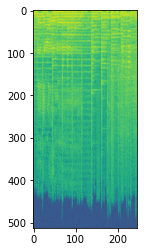

In [8]:
import matplotlib.pyplot as plt
import numpy as np

I=np.random.choice(range(lenX))
plt.imshow(X2[I])
print("image label = "+str(Y[I]))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.1, random_state=42)

In [10]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

3 1 3 1


In [11]:
np.save('MusicTrainingImages2',X_train)
np.save('MusicTrainingLabels2',y_train)

In [12]:
np.save('MusicTestingImages2',X_test)
np.save('MusicTestingLabels2',y_test)

In [13]:
X=np.load("MusicTrainingImages2.npy")
lenX=len(X)
Xnew=np.zeros((lenX,1,513,245))
for i in range(lenX):
    Xnew[i,0,:,:]=X[i,:,:]
np.save("MusicTrainingImagesReshaped2",Xnew)
X=np.load("MusicTestingImages2.npy")
lenX=len(X)
Xnew=np.zeros((lenX,1,513,245))
for i in range(lenX):
    Xnew[i,0,:,:]=X[i,:,:]
np.save("MusicTestingImagesReshaped2",Xnew)


In [ ]:
# # produce greyscale instead
# def spectrogram_for_random_snippet(y,fileid):
#     dur=5*44100
#     I=np.random.choice(range(len(y)-dur))
#     s=y[I:I+dur]
#     nperseg=1024
#     f, t, Sxx = signal.spectrogram(s, fs=44100, nperseg=nperseg)
#     print(type(Sxx))
#     imgplot=plt.imshow(np.log(Sxx),cmap='gray')

#     plt.axis('off')
# #     # Removed anything that's not spectrogram itself to avoid margines
#     plt.savefig(fileid.rstrip('.wav').split('/')[-1] + "gray.png",bbox_inches='tight',transparent="True", pad_inches=0)
#     plt.show()
#     return(f,t,Sxx)

In [ ]:
# # greyscale
# count=0
# Tot_T_gray=[]
# genrelst=['Bachata', 'Argentina Tango','Afro Hits', 'Disney Hits', 'Electronic_ Definitive', 'Hiphop', 
#           'Saxophone Hits Cover', '1990s R&B', '2010s R&B', 'lofi + chill','Peaceful Piano','Blues Classics']
# for genre in genrelst:
#     print(genre)
#     T_Sxx_gray=[]
#     for filename in os.listdir(genre):
#         fileid=genre+"\{0}".format(filename)
#         print(fileid)
#         try:
#             x,samplerate=sf.read(fileid)
# #           # make this mono by adding the two channels
#             #
#             y=x[:,0]+x[:,1]
#             y.shape
#             f,t,Sxx=spectrogram_for_random_snippet(y,fileid)
# #             Tri_Sxx = tf.tile(np.log(Sxx), [1, 3])
#             Tri_Sxx=np.log(Sxx)
#             T_Sxx_gray.append(Tri_Sxx)
# #             count+=1
# #             if count==4:
# #                 break
#         except:
#             pass
# #         if count==4:
# #             break

#     Tot_T_gray.append(T_Sxx_gray)

In [ ]:
# print(len(T_Sxx_gray))
# print(len(Tot_T_gray))
# print(Tot_T_gray[0][0].shape)